# Exploratory Data Analysis of AI Companies

## Objective
This notebook explores trends in AI company formation, product domains, and user adoption.
The goal is to identify patterns in how AI companies scale and which domains dominate usage.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style("whitegrid")

In [11]:
df = pd.read_csv( 'ai_companies.csv')

## Dataset Overview

The dataset contains information about major AI companies, including:
- Company name and type
- Product domains
- Founding date
- User adoption metrics

This analysis focuses on understanding adoption trends rather than prediction.


In [12]:
df.shape

(9, 6)

In [4]:
df.head()

,Name,Organization (from Organizations),Company type,Product Domain(s),Founding date,Founding source/notes
0,OpenAI,OpenAI,Foundation,"Language,Video",2015-12-01,https://openai.com/index/introducing-openai/
1,Anthropic,Anthropic,Foundation,Language,2021-01-26,https://sacra-filings-cois.s3.us-east-2.amazon...
2,Google,Google DeepMind,Foundation,"Language,Video",1998-09-04,https://en.wikipedia.org/wiki/History_of_Googl...
3,Mistral AI,Mistral AI,Foundation,Language,2023-04-28,https://en.wikipedia.org/wiki/Mistral_AI
4,xAI,xAI,Foundation,"Language,Video",2023-03-09,https://www.documentcloud.org/documents/237782...


In [6]:
df.columns

Index(['Name', 'Organization (from Organizations)', 'Company type',
       'Product Domain(s)', 'Founding date', 'Founding source/notes'],
      dtype='object')

The dataset is small but representative, focusing on major AI organizations
with publicly available usage metrics.


In [63]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Name                               9 non-null      object        
 1   Organization (from Organizations)  9 non-null      object        
 2   Company type                       9 non-null      object        
 3   Product Domain(s)                  9 non-null      object        
 4   Founding date                      7 non-null      datetime64[ns]
 5   Founding source/notes              7 non-null      object        
 6   Name_clean                         9 non-null      object        
 7   Company_clean_x                    7 non-null      object        
 8   Active users                       5 non-null      float64       
 9   Daily tokens                       4 non-null      float64       
 10  Daily messages                     5 non-n

Name                                         object
Organization (from Organizations)            object
Company type                                 object
Product Domain(s)                            object
Founding date                        datetime64[ns]
Founding source/notes                        object
Name_clean                                   object
Company_clean_x                              object
Active users                                float64
Daily tokens                                float64
Daily messages                              float64
Company_clean_y                              object
Staff count                                 float64
Founding Year                               float64
dtype: object

## Data Cleaning and Preparation

Data types were validated and founding dates were converted to datetime format to enable
time-based analysis. Missing values were retained to preserve data authenticity.


In [14]:
df['Founding date'] = pd.to_datetime(df['Founding date'], errors='coerce')


In [17]:
df['Founding Year'] = df['Founding date'].dt.year

In [19]:
df[['Name', 'Founding Year']]

,Name,Founding Year
0,OpenAI,2015.0
1,Anthropic,2021.0
2,Google,1998.0
3,Mistral AI,2023.0
4,xAI,2023.0
5,DeepSeek,2023.0
6,Meta,2004.0
7,Z.ai,NaN
8,MiniMax,NaN


In [20]:
df['Company type'].value_counts()

Company type
Foundation    9
Name: count, dtype: int64

Most companies in the dataset are structured as foundations. This indicates that many leading AI organizations prioritize long-term research and development over short-term commercial objectives.

In [65]:
domains = df['Product Domain(s)'].str.split(',', expand=True)
domain_counts = domains.stack().value_counts()


## Product Domain Analysis

Some companies operate across multiple AI domains (e.g., Language and Video).
To accurately analyze domain-level trends, the product domain column is split and expanded.


Language    9
Video       3
Name: count, dtype: int64

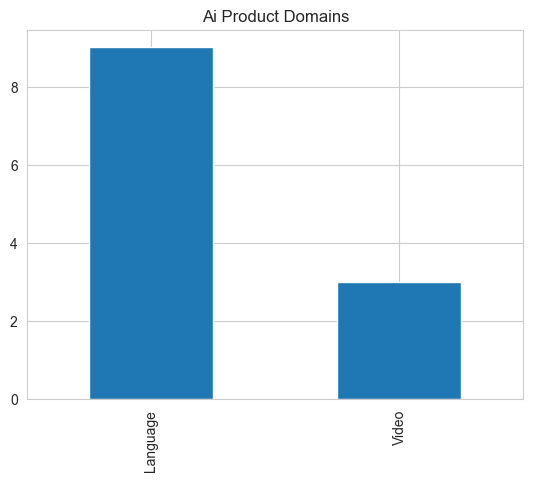

In [64]:
domain_counts.plot(kind = 'bar',title = 'Ai Product Domains')
domain_counts

#### Insight
Language-based AI products dominate the ecosystem, while video-based platforms exhibit
slightly higher average user adoption, likely driven by mass-market consumer tools.


In [27]:
df['Founding Year'].value_counts().sort_index()


Founding Year
1998.0    1
2004.0    1
2015.0    1
2021.0    1
2023.0    3
Name: count, dtype: int64

<Axes: title={'center': 'Foundin Year Trend of AI Companies'}, xlabel='Founding Year'>

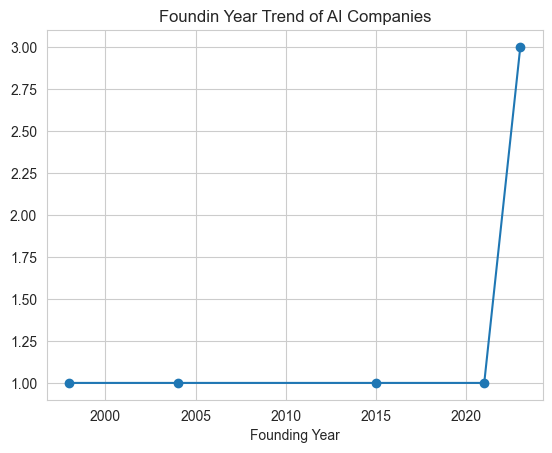

In [28]:
df['Founding Year'].value_counts().sort_index().plot(kind = 'line', marker='o', title='Foundin Year Trend of AI Companies')

A noticeable increase in AI company formations is observed after 2020, aligning with the rapid growth of generative AI technologies.

In [57]:
companies = pd.read_csv("ai_companies.csv")
staff = pd.read_csv("ai_companies_staff_reports.csv")
usage = pd.read_csv("ai_companies_usage_reports.csv")



In [66]:
companies.shape, staff.shape, usage.shape

((9, 6), (44, 13), (47, 16))

In [32]:
companies.columns
staff.columns
usage.columns


Index(['Id', 'Company', 'Active users', 'Active users time period',
       'Daily tokens', 'Daily messages', 'Date', 'Report date', 'Source 1',
       'Source 2', 'Graph note', 'Notes', 'Source type', 'Product',
       'Confidence', 'Exclude from graph view'],
      dtype='object')

In [33]:
companies['Name_clean'] = companies['Name'].str.strip().str.lower()
usage['Company_clean'] = usage['Company'].str.strip().str.lower()


In [34]:
usage_agg = usage.groupby('Company_clean').agg({
    'Active users': 'mean',
    'Daily tokens': 'mean',
    'Daily messages': 'mean'
}).reset_index()


In [35]:
#Merge
df = companies.merge(
    usage_agg,
    left_on='Name_clean',
    right_on='Company_clean',
    how='left'
)


In [37]:
df.shape
df[['Name', 'Active users']]


,Name,Active users
0,OpenAI,3.188462e+08
1,Anthropic,NaN
2,Google,5.641667e+08
3,Mistral AI,NaN
4,xAI,3.950000e+07
5,DeepSeek,1.000000e+07
6,Meta,5.606250e+08
7,Z.ai,NaN
8,MiniMax,NaN


Usage data did not contain a unique company identifier, so company names were normalized and aggregated prior to merging to avoid one-to-many duplication.

In [39]:
companies.columns

Index(['Name', 'Organization (from Organizations)', 'Company type',
       'Product Domain(s)', 'Founding date', 'Founding source/notes',
       'Name_clean'],
      dtype='object')

In [40]:
usage = pd.read_csv('ai_companies_usage_reports.csv')
usage['Company_clean'] = usage['Company'].str.strip().str.lower()

In [42]:
usage_agg = usage.groupby('Company_clean').agg({
    'Active users' : 'mean',
    'Daily tokens' : 'mean',
    'Daily messages' : 'mean'
    }).reset_index()

In [44]:
df = companies.merge(
    usage_agg,
    left_on = 'Name_clean',
    right_on = 'Company_clean',
    how = 'left'
)

## Staff Size vs User Adoption

This section examines whether AI company growth scales proportionally with workforce size.


In [47]:
df.shape
df[['Name','Active users','Daily tokens']]

,Name,Active users,Daily tokens
0,OpenAI,3.188462e+08,3.577667e+12
1,Anthropic,NaN,NaN
2,Google,5.641667e+08,2.046460e+13
3,Mistral AI,NaN,NaN
4,xAI,3.950000e+07,NaN
5,DeepSeek,1.000000e+07,7.880000e+11
6,Meta,5.606250e+08,NaN
7,Z.ai,NaN,1.600700e+12
8,MiniMax,NaN,NaN


In [48]:
staff.columns

Index(['Id', 'Company', 'Staff count', 'Date', 'Report date', 'Source 1',
       'Source 2', 'Notes', 'Type', 'Division name', 'Source type',
       'Confidence', 'Graph note'],
      dtype='object')

In [51]:
staff['Company_clean'] = staff['Company'].str.strip().str.lower()
staff_agg =staff.groupby('Company_clean').agg({
    'Staff count' : 'mean'
}).reset_index()

df = df.merge(
    staff_agg,
    left_on = 'Name_clean',
    right_on = 'Company_clean',
    how = 'left'
)

In [52]:
df.shape
df.isnull().sum()
df.describe()


,Active users,Daily tokens,Daily messages,Staff count
count,5.000000e+00,4.000000e+00,5.000000e+00,9.000000
mean,2.986276e+08,6.607742e+12,4.241200e+08,720.348541
std,2.692654e+08,9.311887e+12,6.908957e+08,580.535678
min,1.000000e+07,7.880000e+11,5.000000e+07,160.000000
25%,3.950000e+07,1.397525e+12,7.500000e+07,264.800000
50%,3.188462e+08,2.589183e+12,1.400000e+08,684.777778
75%,5.606250e+08,7.799400e+12,2.000000e+08,883.000000
max,5.641667e+08,2.046460e+13,1.655600e+09,1965.909091


### Insight
User adoption does not scale linearly with staff size. Several AI platforms achieve massive
reach with relatively lean teams, highlighting the efficiency enabled by AI-driven systems.


In [53]:
df.groupby('Company type')['Active users'].mean()


Company type
Foundation    2.986276e+08
Name: Active users, dtype: float64

## User Adoption Trends

This section analyzes active user metrics to understand which AI domains and companies
attract the largest user bases.


In [55]:
domains = df[['Name', 'Active users', 'Product Domain(s)']].copy()
domains['Product Domain(s)'] = domains['Product Domain(s)'].str.split(',')
domains = domains.explode('Product Domain(s)')
domains['Product Domain(s)'] = domains['Product Domain(s)'].str.strip()


In [56]:
domains.groupby('Product Domain(s)')['Active users'] \
       .mean() \
       .sort_values(ascending=False)


Product Domain(s)
Video       3.075043e+08
Language    2.986276e+08
Name: Active users, dtype: float64

### Insight
User adoption is highly skewed. A small number of dominant platforms account for a
significant proportion of total users.


## Founding Year vs User Adoption

This analysis compares founding year with average active users to assess whether
newer AI companies scale faster than established organizations.


In [61]:
df['Founding date'] = pd.to_datetime(df['Founding date'], errors='coerce')
df['Founding Year'] = df['Founding date'].dt.year


In [62]:
df.groupby('Founding Year')['Active users'] \
  .mean() \
  .sort_index()


Founding Year
1998.0    5.641667e+08
2004.0    5.606250e+08
2015.0    3.188462e+08
2021.0             NaN
2023.0    2.475000e+07
Name: Active users, dtype: float64

### Insight

Older technology organizations account for the largest absolute user bases,
reflecting their established platforms and market reach. Recently founded
AI-native companies show lower user counts, consistent with early-stage
adoption rather than lack of scalability.


Usage data was unavailable for companies founded in 2021 and was retained as missing to preserve data integrity.

# Key Takeaways

- AI user adoption is highly concentrated among a small number of dominant platforms
- Product domain influences adoption patterns, especially for consumer-facing tools
- Established companies continue to dominate total user counts
- AI enables non-linear growth, allowing platforms to scale without proportional staff increases

## Conclusion

This exploratory analysis highlights how AI companies scale differently from traditional
technology firms. While newer AI-native companies are emerging rapidly, established
organizations retain dominance in absolute usage. The findings demonstrate AI’s potential
to enable efficient, scalable growth across industries.
